# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob
import json
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
sns.set_theme(context='paper', style='dark', font_scale=1)

In [3]:
name="score_vs_R_k"
width_pt = 469
golden = (1 + 5 ** 0.5) / 2
font_scale = 3.5
fig_height = 7
type_dict = {
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'avg_group_size' : float,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'N' : int,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [4]:
N=200
files = glob.glob("./outputs/{name}_*_N_{N}_*.json".format(name=name, N=N))

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        sizes = []
        for group_id in js['groups']:
            sizes.append(int(js['groups'][group_id]))

        avg_group_size = np.mean(sizes)
        
        for seed in js['seeds']:
            seed_js = js.copy()
            seed_js.pop('seeds', None)
            seed_js.pop('groups', None)    
            seed_js = seed_js | js['seeds'][seed]
            seed_js['seed']=seed
            seed_js['avg_group_size'] = avg_group_size

            dicts.append(seed_js)

input_df = pd.DataFrame(dicts)

Reading file 200/200


In [5]:
total_df = input_df.astype(type_dict) # Fix types
total_df = total_df.rename(columns={"method": "Method", "score": "Score"}) # Rename columns
total_df = total_df.replace({'binomial': 'Dorfman', 'negbin': 'Algorithm 1'}) # Rename methods

In [6]:

results = total_df[(total_df['N']==N) & (total_df['lambda_1']==0.0) & (total_df['lambda_2']==0.0) & (total_df['k']<=1.0)]
results = results.pivot(index=['lambda_1', 'lambda_2', 'se', 'sp', 'r', 'k', 'seed', 'N'], columns='Method', values='Score').reset_index()
results['Percentage'] = (results['Dorfman'] - results['Algorithm 1'])/results['Dorfman']*100
results = results[['r','k','Percentage']]
results = results.groupby(['r', 'k']).mean().reset_index()
results = results.pivot('r', 'k', 'Percentage')

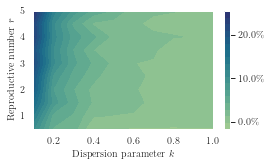

In [7]:
utils.latexify(font_size=10)

Z = results.to_numpy()
k = results.columns.to_numpy()
r = results.index.to_numpy()
X, Y = np.meshgrid(k, r)

nbins=20
levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect, fig_height))

# ax.contour(X,Y,Z,levels=levels, colors='black', linestyles='solid')
cs = ax.contourf(X,Y,Z,levels=levels, cmap=sns.color_palette("crest", as_cmap=True))
fig.colorbar(cs,format=mpl.ticker.PercentFormatter(),ticks=[0.0, 10.0, 20.0, 30.0, 40.0])

ax.set_ylabel(r'Reproductive number $r$')
ax.set_xlabel(r'Dispersion parameter $k$')

fig.tight_layout()
fig.savefig('figures/{name}_N_{N}.pdf'.format(name=name, N=N))

In [8]:
# utils.latexify(font_size=10)

# Z = results[100].to_numpy()
# k = results[100].columns.to_numpy()
# r = results[100].index.to_numpy()
# X, Y = np.meshgrid(k, r)

# nbins=20
# levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())

# fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.6)
# fig, ax = plt.subplots(figsize=(fig_height*fig_aspect, fig_height))

# cs = ax.contourf(X,Y,Z,levels=levels, cmap=sns.color_palette("crest", as_cmap=True), linestyles='solid')
# # fig.colorbar(cs, ticks=[0.0, 8.0, 16.0, 24.0, 32.0])
# fig.colorbar(cs,format=mpl.ticker.PercentFormatter(),ticks=[0.0, 8.0, 16.0, 24.0, 32.0])
# ax.set_ylabel(r'Reproductive number $r$')
# ax.set_xlabel(r'Dispersion parameter $k$')

# fig.tight_layout()
# fig.savefig('figures/{name}_N_100.pdf'.format(name=name))

In [9]:
# utils.latexify(font_size=10, font_family='serif', font_name='Computer Modern')

# fig_height, fig_aspect = get_fig_dim(width_pt, fraction=1)
# fig, ax = plt.subplots(figsize=(fig_height*fig_aspect, fig_height))

# sns.heatmap(data=results[20], cmap='flare', square=True, ax=ax)

# k_ticks = ['0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '$10$', '$10^2$', '$10^3$', '$10^4$']
# ax.set_xticklabels(k_ticks)
# for label in ax.get_xmajorticklabels():
#     label.set_rotation(30)
#     label.set_horizontalalignment("center")

# fig.tight_layout()
# fig.savefig('figures/{name}_N_20.pdf'.format(name=name))

In [10]:
# utils.latexify(font_size=10, font_family='serif', font_name='Computer Modern')

# fig_height, fig_aspect = get_fig_dim(width_pt, fraction=1)
# fig, ax = plt.subplots(figsize=(fig_height*fig_aspect, fig_height))

# sns.heatmap(data=results[100], cmap='flare', square=True, ax=ax)

# k_ticks = ['0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '$10$', '$10^2$', '$10^3$', '$10^4$']
# ax.set_xticklabels(k_ticks)
# for label in ax.get_xmajorticklabels():
#     label.set_rotation(30)
#     label.set_horizontalalignment("center")

# fig.tight_layout()
# fig.savefig('figures/{name}_N_100.pdf'.format(name=name))